In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

The chance of winning is 0.25


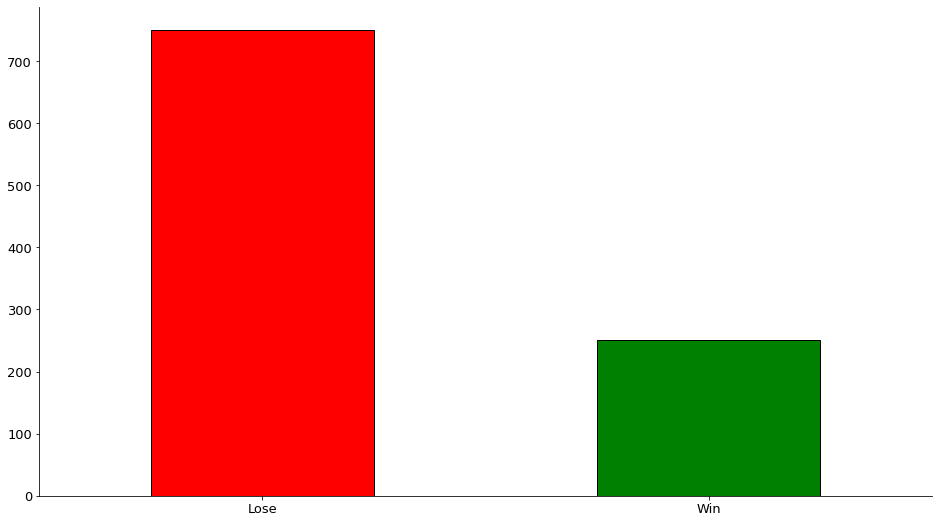

In [35]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar(color=("red", "green"))
plt.xticks(rotation=0)
print('The chance of winning is %.2f' % tickets.mean())

In [4]:
n = 25
tickets.sample(n).mean()

0.12

In [5]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

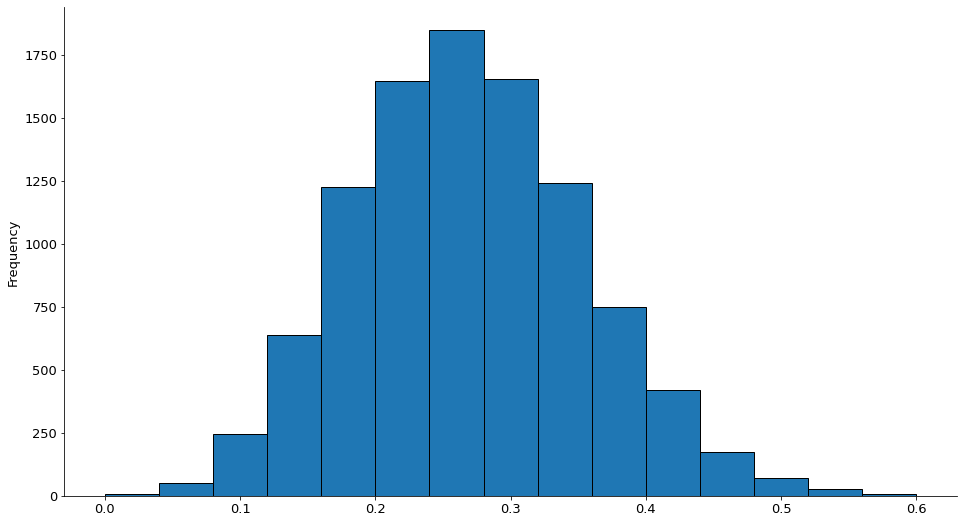

In [6]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

In [7]:
se = math.sqrt((.25 * .75) / n)

In [15]:
se

0.08660254037844387

In [16]:
calculated_winrates.std()

0.08569044351157716

In [17]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

## Has the network latency gone up since we switched internet service providers?

#H0 = latency is present
#H1 = latency is not present

#True Positive = latency is present with new internet provider and there is latency issues
#Type I = latency is present with the new internet provider, but there is no latency
#Type II = latency is not present with new internet provider, and has latency issues
#True Negative = latency is not present with the new internet provider, and there is no latency issues

# Is the website redesign any good?

#H0 = survey concludes website redesign response is > mean of responses on 1 - 5 scale
#H1 = survey concludes website redesign response is <= mean of responses on 1 - 5 scale

#True Positive = website design rating is well above mean
#Type I = website design rating is in between mean and standard deviation and above mean
#Type II = website design rating is in between mean and standard deviation and below mean
#True Negative = website design rating is well below mean

# Is our television ad driving more sales?

#H0 = mean of post ad sales > mean of pre ad sales
#H1 = mean of post ad sales <= mean of pre ad sales

#True Positive = mean of post ad sales is well above mean of pre ad sales
#Type I = mean of post ad sales is in between mean and standard deviation and above mean of pre ad sales
#Type II = mean of post ad sales is in between mean and standard deviation and below mean of pre ad sales
#True Negative = mean of post ad sales is well below mean of pre ad sales